# Cleaning data

In [1]:
import pandas as pd

In [2]:
!wget https://github.com/Ratsemaat/Macrosomia/raw/main/Pregnancy_Data.csv -O Pregnancy_Data.csv
df = pd.read_csv("Pregnancy_Data.csv")
df['bmi'] = df['bmi'].str.replace(',','.')
df=df.astype({'bmi': 'float64'})


--2020-12-13 16:48:14--  https://github.com/Ratsemaat/Macrosomia/raw/main/Pregnancy_Data.csv
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Ratsemaat/Macrosomia/main/Pregnancy_Data.csv [following]
--2020-12-13 16:48:14--  https://raw.githubusercontent.com/Ratsemaat/Macrosomia/main/Pregnancy_Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 436014 (426K) [text/plain]
Saving to: ‘Pregnancy_Data.csv’

Pregnancy_Data.csv  100%[===================>] 425.79K  --.-KB/s    in 0.03s   

2020-12-13 16:48:14 (15.3 MB/s) - ‘Pregnancy_Data.csv’ saved [436014/436014]



Dropping irrelevant data

In [3]:
df = df.drop("A", axis=1) # some kind of ID
df = df.drop("ga_week", axis=1) 
df = df.drop("idcode", axis=1) # We do not need to identify mothers.
df = df.drop("kmiyle25", axis=1) # There already exists BMI column. So a boolean that tells whether it is higher than 25 is useless.

#Since the timing of glucose tolerance test does not matter.
df = df.drop("fasting_glycose", axis=1)
df = df.drop("gestage_gtt_ndalates", axis=1)
df = df.drop("gestage_gtt1", axis=1)
df = df.drop("gestage_gtt2_ndalates", axis=1)
df = df.drop("gestage_gtt2", axis=1)

#We already have difference of days, so we do not need to record any dates.
df = df.drop("synnitus", axis=1)
df = df.drop("datekuni20", axis=1)
df = df.drop("datekuni24", axis=1)
df = df.drop("datekuni28", axis=1)
df = df.drop("datekuni34", axis=1)
df = df.drop("dateviimane", axis=1)
df = df.drop("pikkus", axis=1) # Height is taken into account in BMI column.

#The difference in weights is duplicated a lot
df = df.drop("iive2034", axis=1)
df = df.drop("iive2434", axis=1)
df = df.drop("kaaluiivekuni34", axis=1)
df = df.drop("kaaluiivekuni28", axis=1)
df = df.drop("iive2028", axis=1)
df = df.drop("kaaluiivekuni24", axis=1)
df = df.drop("iive2024", axis=1)
df = df.drop("iive2428", axis=1)
df = df.drop("iive2834", axis=1)
df = df.drop("iive_34_kuni_hiljemkui34", axis=1)
df = df.drop("iive_28_hiljemkui34", axis=1)
df = df.drop("kaaluive_alla20", axis=1)
df = df.drop("iive_24_hiljemkui34", axis=1)
df = df.drop("iive_20hiljemkui34", axis=1)
df = df.drop("iive_alg_kuni_hiljemkui34", axis=1)
df = df.drop("kaaluiivekuniviimasekaaluni", axis=1)

# `synnitus_ras_kestus_paevades` and `gestage` are equal (except for 1 row)
df = df.drop("gestage", axis=1)


# Data preprocessing

Renaming and translating.


In [4]:
df =df.rename(columns={"synnitus_ras_kestus_paevades": "gestage_total",
                   "vanus_algul": "age",
                   "mitmes_syn":"childbirth_n",
                   "gdm_varem":"prev_gdm",
                   "suur_laps_varem":"prev_macrosomia",
                   "sugu":"sex",
                   "synnikaal":"child_weight",
                   "makrosoomia":"macrosomia",
                   "kaal_enne":"weight_start",
                   "maxtotalkaal":"max_weight",
                   "kaaluiive":"max_weight_delta",
                   "gestagekuni20": "gestage_days_20",
                   "gestagekuni24": "gestage_days_24",
                   "gestagekuni28": "gestage_days_28",
                   "gestagekuni34": "gestage_days_34",
                   "gestage_viimane":"gestage_days_last",
                   "kaal_kuni20": "weight_20",
                   "kaal_kuni24": "weight_24",
                   "kaalkuni28": "weight_28",
                   "kaalkuni34": "weight_34",
                   "kaal_viimane_enne synnitust": "weight_last",
                   })


In [5]:
print("There are " + str(df.shape[1]) + " basic attributes in total.")

There are 24 basic attributes in total.


In [6]:
df['macrosomia'].value_counts()

0    1487
1     285
Name: macrosomia, dtype: int64

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


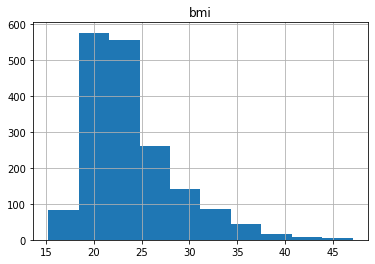

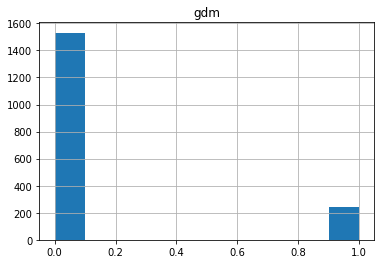

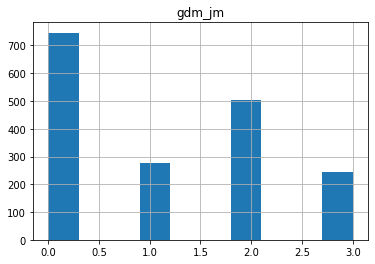

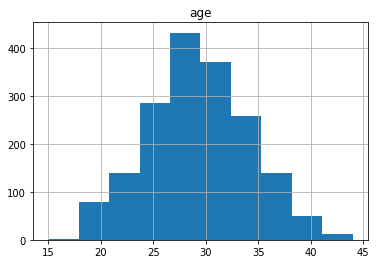

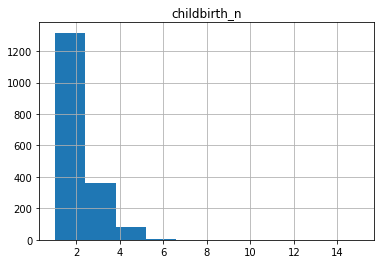

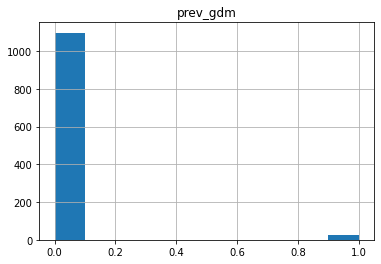

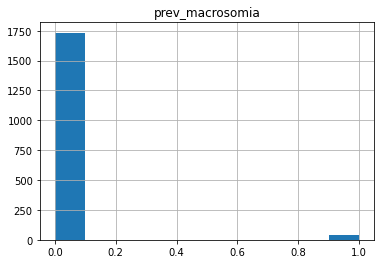

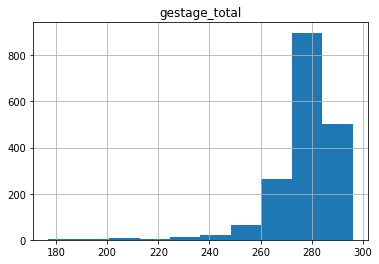

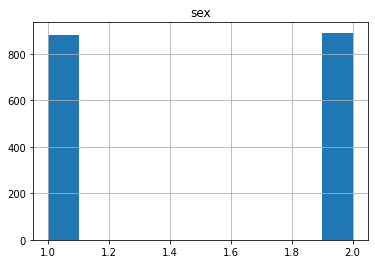

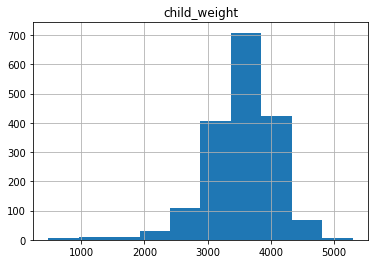

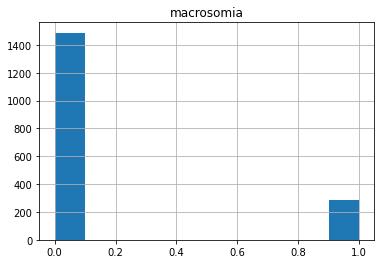

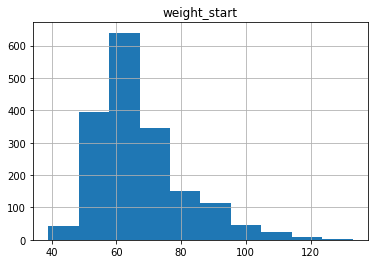

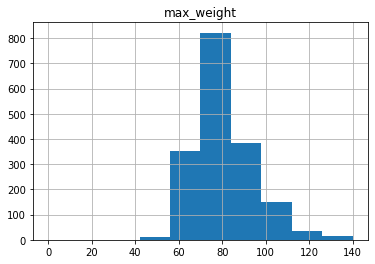

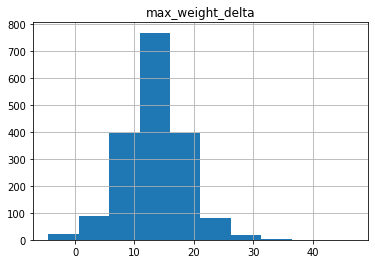

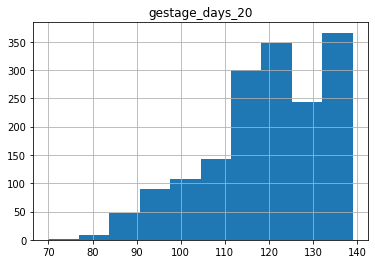

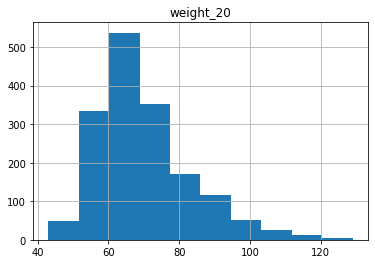

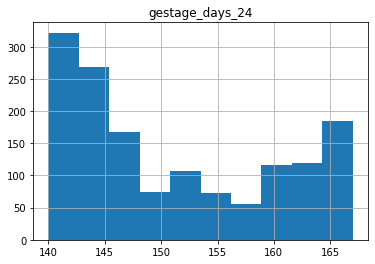

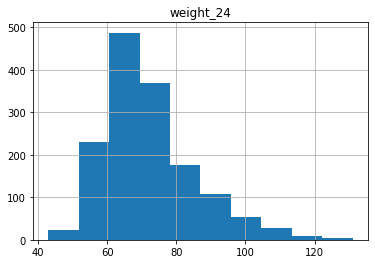

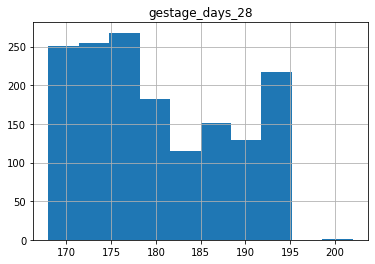

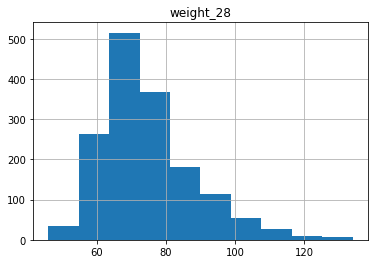

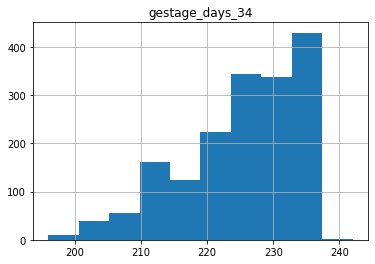

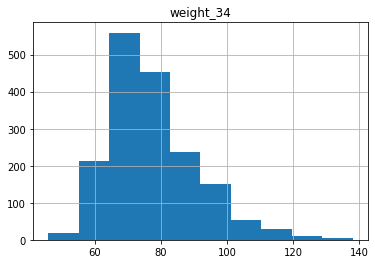

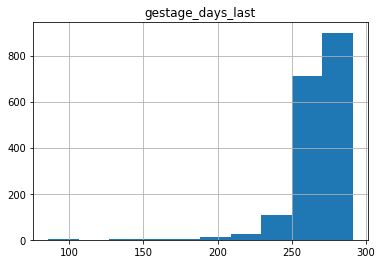

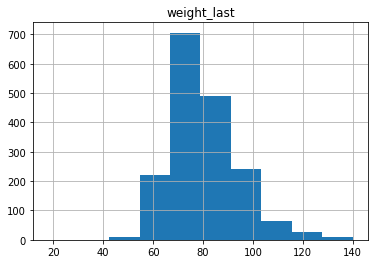

In [7]:
for field in df.columns:
    if df[field].dtype=='int64' or df[field].dtype=='float64':
        df.hist(column=field)

In [8]:
df[df.weight_20.isna() | df.weight_24.isna() | df.weight_28.isna() | df.weight_34.isna()]
# Quite a lot missing weight values

,bmi,gdm,gdm_jm,age,childbirth_n,prev_gdm,prev_macrosomia,gestage_total,sex,child_weight,macrosomia,weight_start,max_weight,max_weight_delta,gestage_days_20,weight_20,gestage_days_24,weight_24,gestage_days_28,weight_28,gestage_days_34,weight_34,gestage_days_last,weight_last
4,20.861120,0,0,35,2,0.0,0,248,2,2356,0,61.0,67.0,6.0,115.0,62.5,157.0,67.0,NaN,NaN,NaN,NaN,157.0,67.0
7,23.388687,0,0,35,3,0.0,0,271,2,3100,0,70.0,81.0,11.0,137.0,71.5,NaN,NaN,179.0,73.5,214.0,78.1,259.0,81.0
8,22.720438,0,2,38,3,0.0,1,274,2,3906,1,68.0,88.0,20.0,134.0,76.3,NaN,NaN,169.0,78.6,237.0,85.5,258.0,88.0
12,22.343516,0,1,30,2,0.0,0,288,2,3700,0,70.0,83.6,13.6,138.0,74.9,166.0,76.2,NaN,NaN,229.0,80.3,285.0,83.6
18,17.928215,0,2,22,2,0.0,0,273,1,3500,0,50.0,63.0,13.0,139.0,52.6,NaN,NaN,172.0,56.8,237.0,60.7,256.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,30.043262,0,1,33,2,0.0,0,292,2,3694,0,75.0,85.1,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,289.0,84.7
1751,20.796730,0,1,30,1,NaN,0,282,1,3460,0,58.0,71.5,13.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,277.0,71.5
1755,22.321429,0,2,30,2,0.0,0,276,1,4048,1,63.0,82.1,19.1,139.0,68.2,NaN,NaN,173.0,73.4,227.0,78.6,270.0,82.1
1763,23.938990,0,0,19,1,NaN,0,284,1,4000,0,70.0,82.6,12.6,NaN,NaN,164.0,74.0,195.0,76.5,231.0,78.1,283.0,82.4


In [9]:
df[df.weight_20.isna() & df.weight_24.isna() & df.weight_28.isna() & df.weight_34.isna()]

,bmi,gdm,gdm_jm,age,childbirth_n,prev_gdm,prev_macrosomia,gestage_total,sex,child_weight,macrosomia,weight_start,max_weight,max_weight_delta,gestage_days_20,weight_20,gestage_days_24,weight_24,gestage_days_28,weight_28,gestage_days_34,weight_34,gestage_days_last,weight_last
288,24.167162,0,0,39,3,0.0,0,270,2,2952,0,65.0,73.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269.0,73.0
520,19.051974,0,1,29,2,0.0,0,285,1,3720,0,50.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
534,16.731112,0,0,15,1,0.0,0,265,2,3350,0,45.0,63.4,18.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.0,63.4
757,19.467401,1,3,30,2,0.0,0,285,1,3770,0,53.0,70.3,17.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,282.0,70.3
1058,20.385675,0,0,31,1,NaN,0,283,1,3890,0,55.5,74.2,18.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281.0,74.2
1674,34.063609,0,1,25,2,0.0,0,275,1,3425,0,95.0,103.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.0,103.0
1733,30.859607,0,3,28,1,0.0,0,275,1,3740,0,83.0,91.3,8.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,268.0,91.3
1735,18.099375,0,0,33,1,NaN,0,280,2,3355,0,47.5,61.0,13.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284.0,61.0
1748,30.043262,0,1,33,2,0.0,0,292,2,3694,0,75.0,85.1,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,289.0,84.7
1751,20.796730,0,1,30,1,NaN,0,282,1,3460,0,58.0,71.5,13.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,277.0,71.5


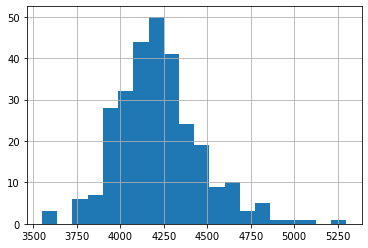

In [10]:
df[df.macrosomia == 1].child_weight.hist(bins=20)

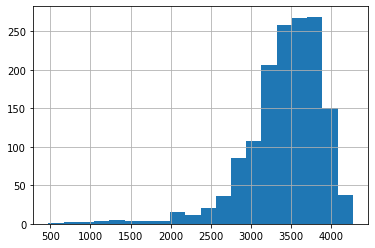

In [11]:
df[df.macrosomia == 0].child_weight.hist(bins=20)

In [12]:
df

,bmi,gdm,gdm_jm,age,childbirth_n,prev_gdm,prev_macrosomia,gestage_total,sex,child_weight,macrosomia,weight_start,max_weight,max_weight_delta,gestage_days_20,weight_20,gestage_days_24,weight_24,gestage_days_28,weight_28,gestage_days_34,weight_34,gestage_days_last,weight_last
0,29.000595,0,1,42,1,NaN,0,284,2,4180,1,70.0,79.0,9.0,116.0,73.0,159.0,75.5,180.0,76.4,234.0,77.7,279.0,78.0
1,27.885187,0,2,40,2,0.0,0,273,1,3764,0,75.0,97.5,22.5,128.0,85.2,156.0,88.3,183.0,90.0,232.0,94.4,267.0,97.5
2,18.253110,1,3,36,3,0.0,0,275,2,3640,0,54.0,69.5,15.5,110.0,57.5,152.0,63.0,181.0,64.5,215.0,67.5,263.0,69.5
3,23.289616,0,1,35,2,0.0,0,274,1,2926,0,68.9,79.8,10.9,118.0,71.1,142.0,73.2,177.0,75.2,226.0,76.5,262.0,79.8
4,20.861120,0,0,35,2,0.0,0,248,2,2356,0,61.0,67.0,6.0,115.0,62.5,157.0,67.0,NaN,NaN,NaN,NaN,157.0,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,26.674874,0,2,24,1,NaN,0,288,2,3300,0,78.0,87.1,9.1,107.0,81.0,142.0,79.6,177.0,81.2,221.0,84.7,282.0,87.1
1768,27.434842,0,1,26,1,NaN,0,256,2,2635,0,72.0,89.1,17.1,114.0,77.2,142.0,78.8,191.0,84.2,232.0,88.4,247.0,89.1
1769,21.230572,0,2,24,2,0.0,0,279,1,3750,0,53.0,66.0,13.0,131.0,60.0,NaN,NaN,173.0,63.0,229.0,64.6,271.0,66.0
1770,21.083563,0,0,32,3,0.0,0,279,1,3475,0,57.4,76.9,19.5,122.0,63.0,143.0,63.6,172.0,66.5,227.0,71.9,271.0,76.9


In [13]:
# Replace missing weights using interpolate

df[['weight_start', 'weight_20', 'weight_24', 'weight_28', 'weight_34', 'weight_last']] = df[['weight_start', 'weight_20', 'weight_24', 'weight_28', 'weight_34', 'weight_last']].interpolate(axis=1)

In [14]:
# Some feature engineering

df['weight_20_gain'] = (df['weight_20'] - df['weight_start'])
df['weight_24_gain'] = (df['weight_24'] - df['weight_20'])
df['weight_28_gain'] = (df['weight_28'] - df['weight_24'])
df['weight_34_gain'] = (df['weight_34'] - df['weight_28'])
df['weight_last_gain'] = (df['weight_last'] - df['weight_34'])

df['relative_max_weight_gain'] = (df['max_weight'] - df['weight_start'])/df['weight_start']
df['relative_weight_20_gain'] = (df['weight_20'] - df['weight_start'])/df['weight_start']
df['relative_weight_24_gain'] = (df['weight_24'] - df['weight_20'])/df['weight_20']
df['relative_weight_28_gain'] = (df['weight_28'] - df['weight_24'])/df['weight_24']
df['relative_weight_34_gain'] = (df['weight_34'] - df['weight_28'])/df['weight_28']
df['relative_weight_last_gain'] = (df['weight_last'] - df['weight_34'])/df['weight_34']

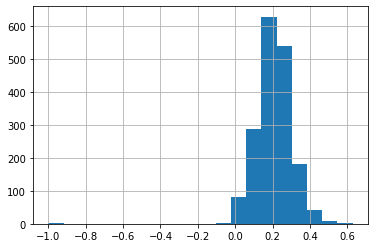

In [15]:
df['relative_max_weight_gain'].hist(bins=20)

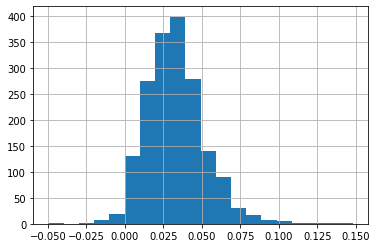

In [16]:
df['relative_weight_28_gain'].hist(bins=20)

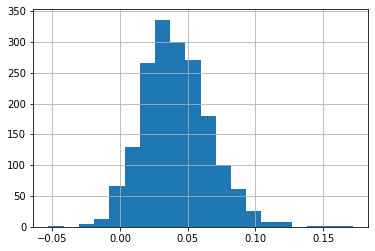

In [17]:
df['relative_weight_34_gain'].hist(bins=20)

Meanings of different fields:

- **bmi** - body mass index
- **gdm** - whether the person had gestational diabetes
- **gdm_jm** - 0 if the person had low risk of GDM and was not tested for GDM; 1 if the person had risk of GDM, but was not tested; 2 if the person was tested, but did not have GDM; 3 if the person was tested and had GDM
- **age** - age of the person in years
- **childbirth** - how many times the person has given birth before
- **prev_gdm** - whether the person has had GDM before
- **prev_macrosomia** - whether the person has had a child with macrosomia before
- **gestage_total** - duration of pregnancy in days
- **sex** - sex of the child
- **child_weight** - weight of the child in grams
- **macrosomia** - whether the child has macrosomia
- **weight_start** - weight of the person in kg at the start of pregnancy
- **max_weight** - the maximum weight of the person in kg during the pregnancy
- **max_weight_delta** - *max_weight* - *weight_start* in kg
- **relative_max_weight_gain** - $\frac{max\_weight - weight\_start}{weight\_start}$
- **relative_weight_20_gain** $\frac{weight\_start - weight\_20}{weight\_20}$
- **relative_weight_24_gain** $\frac{weight\_24 - weight\_20}{weight\_20}$
- **relative_weight_28_gain** $\frac{weight\_28 - weight\_24}{weight\_24}$
- **relative_weight_34_gain** $\frac{weight\_34 - weight\_28}{weight\_28}$
- **relative_weight_last_gain** $\frac{weight\_last - weight\_34}{weight\_34}$
- **weight_20**, **weight_24**, **weight_28**, **weight_34** - weight of the person in kg at week 20, 24, 28, 34
- **weight_last** - last measured weight during pregnancy in kg


In [18]:
# There are NAN values in this column
# It means that it is the first child.
# Since these are nominal attributes, we use 1-hot encoding
df = pd.get_dummies(df, columns=['prev_gdm', 'gdm', 'gdm_jm'])

In [19]:
df.max_weight_delta=df.max_weight-df.weight_start

In [20]:
for column in df.columns:
  print(column + "  " + str(df[column].isna().sum()))

bmi  0
age  0
childbirth_n  0
prev_macrosomia  0
gestage_total  0
sex  0
child_weight  0
macrosomia  0
weight_start  0
max_weight  0
max_weight_delta  0
gestage_days_20  117
weight_20  0
gestage_days_24  283
weight_24  0
gestage_days_28  203
weight_28  0
gestage_days_34  46
weight_34  0
gestage_days_last  1
weight_last  0
weight_20_gain  0
weight_24_gain  0
weight_28_gain  0
weight_34_gain  0
weight_last_gain  0
relative_max_weight_gain  0
relative_weight_20_gain  0
relative_weight_24_gain  0
relative_weight_28_gain  0
relative_weight_34_gain  0
relative_weight_last_gain  0
prev_gdm_0.0  0
prev_gdm_1.0  0
gdm_0  0
gdm_1  0
gdm_jm_0  0
gdm_jm_1  0
gdm_jm_2  0
gdm_jm_3  0


# Training

Splitting data into training, testing and validation dataset

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop("macrosomia", axis=1), df["macrosomia"], test_size=0.3, random_state=0)

X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

Training different models

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
import sklearn

def train_models(X_train: pd.DataFrame, y_train: pd.DataFrame, x_features, cross_validate=True)-> pd.DataFrame:
  dfs = []
  models = [
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC(probability=True)), 
          ('GNB', GaussianNB()),
          ('XGB', XGBClassifier())
        ]
  results = []
  names = []
  scoring = ['f1', 'roc_auc', 'recall']

  validation_results = pd.DataFrame(columns=['model', 'accuracy', 'f score', 'recall', 'precision', 'roc auc'])
  trained_models = []

  for name, model in models:
    if cross_validate:
      kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
      cv_results = model_selection.cross_validate(model, X_train[x_features], y_train, cv=kfold, scoring=scoring)

      results.append(cv_results)
      names.append(name)

      this_df = pd.DataFrame(cv_results)
      this_df['model'] = name
      dfs.append(this_df)
    
    # Create new model for measuring how good model is on validation data
    new_model = sklearn.base.clone(model)
    new_model.fit(X_train[x_features], y_train)
    y_pred = new_model.predict(X_validation[x_features])
    model_data = {
        'model': name,
        'accuracy': accuracy_score(y_validation, y_pred),
        'f score': f1_score(y_validation, y_pred),
        'recall': recall_score(y_validation, y_pred),
        'precision': precision_score(y_validation, y_pred),
        'roc auc': roc_auc_score(y_validation, new_model.predict_proba(X_validation[x_features])[:, 1])
    }
    validation_results = validation_results.append(model_data, ignore_index=True)
    trained_models.append((name, new_model))

  if cross_validate:
    final = pd.concat(dfs, ignore_index=True)
    print('Results with cross validation')
    print(final)

  print('Results on validation data')
  print(validation_results)

  return trained_models
  

In [23]:
case1_features = ["bmi", "gdm_0", "gdm_1", "age", "childbirth_n", "prev_macrosomia", "sex", "weight_start", "max_weight_delta"]

In [24]:
t = train_models(X_train, y_train, case1_features)
print(t[0][1].feature_importances_)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results with cross validation
    fit_time  score_time   test_f1  test_roc_auc  test_recall model
0   0.219023    0.028229  0.206897      0.672181     0.136364    RF
1   0.209995    0.026104  0.130435      0.640789     0.078947    RF
2   0.218533    0.025803  0.275862      0.651424     0.170213    RF
3   0.216156    0.026011  0.130435      0.640038     0.073171    RF
4   0.223465    0.026320  0.105263      0.611440     0.066667    RF
5   0.005623    0.014244  0.067797      0.502952     0.045455   KNN
6   0.003795    0.017979  0.034483      0.435777     0.026316   KNN
7   0.003239    0.014013  0.225806      0.578491     0.148936   KNN
8   0.002532    0.014410  0.081633      0.540591     0.048780   KNN
9   0.002596    0.014470  0.137931      0.513355     0.088889   KNN
10  0.117985    0.011778  0.000000      0.585450     0.000000   SVM
11  0.125069    0.011765  0.000000      0.564662     0.000000   SVM
12  0.142371    0.011805  0.000000      0.604213     0.000000   SVM
13  0.127005    0.

In [25]:
features_2 = ["bmi", "gdm_0", "gdm_1", "gdm_jm_0", "gdm_jm_1", "gdm_jm_2", "gdm_jm_3", "age", "childbirth_n", "prev_macrosomia", "sex", "weight_start", "max_weight_delta", "prev_gdm_0.0", "prev_gdm_1.0", "gestage_total"]
trained = train_models(X_train, y_train, features_2)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results with cross validation
    fit_time  score_time   test_f1  test_roc_auc  test_recall model
0   0.214154    0.026394  0.210526      0.639260     0.136364    RF
1   0.215333    0.027873  0.173913      0.641792     0.105263    RF
2   0.208988    0.026327  0.081633      0.649413     0.042553    RF
3   0.225409    0.027946  0.088889      0.631495     0.048780    RF
4   0.215513    0.028084  0.072727      0.540996     0.044444    RF
5   0.003140    0.016928  0.101695      0.587567     0.068182   KNN
6   0.003246    0.016648  0.149254      0.505702     0.131579   KNN
7   0.003101    0.016814  0.065574      0.575103     0.042553   KNN
8   0.003217    0.016812  0.085106      0.589784     0.048780   KNN
9   0.003279    0.016654  0.166667      0.616858     0.111111   KNN
10  0.113002    0.013458  0.000000      0.562723     0.000000   SVM
11  0.117789    0.013844  0.000000      0.589599     0.000000   SVM
12  0.109134    0.013297  0.000000      0.561977     0.000000   SVM
13  0.112986    0.

In [26]:
def undersample_data(X_train, y_train, factor):
  np.random.seed(0)

  negative_indices_train = y_train[y_train == 0].index
  positive_count_train = len(y_train[y_train == 1])
  negative_undersampling_indices_train = np.random.choice(negative_indices_train, min(int(positive_count_train * factor), len(negative_indices_train)), replace=False)
  positive_undersampling_indices_train = y_train[y_train == 1].index.to_numpy()
  undersampling_indices_train = np.concatenate([negative_undersampling_indices_train, positive_undersampling_indices_train])

  np.random.shuffle(undersampling_indices_train)

  X_train_undersampling = X_train.loc[undersampling_indices_train]
  y_train_undersampling = y_train.loc[undersampling_indices_train]

  return (X_train_undersampling, y_train_undersampling)

In [27]:
# Undersampling using case1features
for f in [0.9, 1, 1.2, 1.5, 2, 3]:
  print(f'Results when there can be at most {f} times more negative cases in the data than positive ones:')

  X_train_undersampling, y_train_undersampling = undersample_data(X_train, y_train, f)

  train_models(X_train_undersampling, y_train_undersampling, case1_features, cross_validate=False)

Results when there can be at most 0.9 times more negative cases in the data than positive ones:
Results on validation data
  model  accuracy   f score    recall  precision   roc auc
0    RF  0.590226  0.314465  0.694444   0.203252  0.672041
1   KNN  0.533835  0.261905  0.611111   0.166667  0.617452
2   SVM  0.575188  0.280255  0.611111   0.181818  0.684662
3   GNB  0.800752  0.329114  0.361111   0.302326  0.697222
4   XGB  0.605263  0.331210  0.722222   0.214876  0.722162
Results when there can be at most 1 times more negative cases in the data than positive ones:
Results on validation data
  model  accuracy   f score    recall  precision   roc auc
0    RF  0.620301  0.312925  0.638889   0.207207  0.671739
1   KNN  0.560150  0.264151  0.583333   0.170732  0.591908
2   SVM  0.691729  0.305085  0.500000   0.219512  0.683696
3   GNB  0.808271  0.337662  0.361111   0.317073  0.696981
4   XGB  0.635338  0.331034  0.666667   0.220183  0.695048
Results when there can be at most 1.2 times more

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results on validation data
  model  accuracy   f score    recall  precision   roc auc
0    RF  0.774436  0.302326  0.361111   0.260000  0.700906
1   KNN  0.725564  0.262626  0.361111   0.206349  0.619203
2   SVM  0.864662  0.000000  0.000000   0.000000  0.665942
3   GNB  0.812030  0.305556  0.305556   0.305556  0.700000
4   XGB  0.823308  0.389610  0.416667   0.365854  0.726932
Results when there can be at most 3 times more negative cases in the data than positive ones:
Results on validation data
  model  accuracy   f score    recall  precision   roc auc
0    RF  0.834586  0.185185  0.138889   0.277778  0.682367
1   KNN  0.763158  0.202532  0.222222   0.186047  0.570773
2   SVM  0.864662  0.000000  0.000000   0.000000  0.653502
3   GNB  0.812030  0.305556  0.305556   0.305556  0.703382
4   XGB  0.853383  0.204082  0.138889   0.384615  0.713285


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
trained = []
# Undersampling using features_2
for f in [0.9, 1, 1.2, 1.5, 2, 3]:
  print(f'Results when there can be at most {f} times more negative cases in the data than positive ones:')

  X_train_undersampling, y_train_undersampling = undersample_data(X_train, y_train, f)

  trained.append(train_models(X_train_undersampling, y_train_undersampling, features_2, cross_validate=False))

Results when there can be at most 0.9 times more negative cases in the data than positive ones:
Results on validation data
  model  accuracy   f score    recall  precision   roc auc
0    RF  0.609023  0.350000  0.777778   0.225806  0.693418
1   KNN  0.522556  0.265896  0.638889   0.167883  0.620290
2   SVM  0.139098  0.239203  1.000000   0.135849  0.335205
3   GNB  0.800752  0.329114  0.361111   0.302326  0.708816
4   XGB  0.601504  0.320513  0.694444   0.208333  0.698671
Results when there can be at most 1 times more negative cases in the data than positive ones:
Results on validation data
  model  accuracy   f score    recall  precision   roc auc
0    RF  0.680451  0.370370  0.694444   0.252525  0.700906
1   KNN  0.563910  0.283951  0.638889   0.182540  0.626812
2   SVM  0.793233  0.303797  0.333333   0.279070  0.458575
3   GNB  0.808271  0.337662  0.361111   0.317073  0.707005
4   XGB  0.627820  0.335570  0.694444   0.221239  0.684300
Results when there can be at most 1.2 times more

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results on validation data
  model  accuracy   f score    recall  precision   roc auc
0    RF  0.680451  0.341085  0.611111   0.236559  0.711775
1   KNN  0.609023  0.297297  0.611111   0.196429  0.625181
2   SVM  0.864662  0.000000  0.000000   0.000000  0.684541
3   GNB  0.812030  0.342105  0.361111   0.325000  0.707850
4   XGB  0.657895  0.325926  0.611111   0.222222  0.699034
Results when there can be at most 1.5 times more negative cases in the data than positive ones:


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results on validation data
  model  accuracy   f score    recall  precision   roc auc
0    RF  0.733083  0.348624  0.527778   0.260274  0.700060
1   KNN  0.703008  0.324786  0.527778   0.234568  0.628563
2   SVM  0.864662  0.000000  0.000000   0.000000  0.686473
3   GNB  0.808271  0.337662  0.361111   0.317073  0.712319
4   XGB  0.718045  0.299065  0.444444   0.225352  0.677899
Results when there can be at most 2 times more negative cases in the data than positive ones:


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results on validation data
  model  accuracy   f score    recall  precision   roc auc
0    RF  0.804511  0.350000  0.388889   0.318182  0.719263
1   KNN  0.744361  0.276596  0.361111   0.224138  0.603442
2   SVM  0.864662  0.000000  0.000000   0.000000  0.733333
3   GNB  0.812030  0.342105  0.361111   0.325000  0.702295
4   XGB  0.770677  0.282353  0.333333   0.244898  0.686111
Results when there can be at most 3 times more negative cases in the data than positive ones:
Results on validation data
  model  accuracy   f score    recall  precision   roc auc
0    RF  0.830827  0.150943  0.111111   0.235294  0.675604
1   KNN  0.804511  0.235294  0.222222   0.250000  0.619384
2   SVM  0.864662  0.000000  0.000000   0.000000  0.596014
3   GNB  0.804511  0.297297  0.305556   0.289474  0.706159
4   XGB  0.857143  0.296296  0.222222   0.444444  0.711232


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
# RF from previous block achieved the largest F score (0.37), test it on test data

rf = trained[1][0][1]
importances = sorted(rf.feature_importances_, reverse=True)
print(importances)

# Print the importances so that they can be put on the poster
for i in range(len(importances)):
  print(f'"{features_2[i]}",{importances[i]}')

pred = rf.predict(X_test[features_2])
print(f'F1 score on test data: {f1_score(y_test, pred)}')
print(f'Recall on test data: {recall_score(y_test, pred)}')
print(f'Precision on test data: {precision_score(y_test, pred)}')

[0.17781773491749706, 0.16899980815231927, 0.15921177252757063, 0.14851821930316098, 0.1365289470146962, 0.05354673504798139, 0.029824698144492585, 0.028623366357621072, 0.021541356858882622, 0.018258747147994917, 0.013386488007177516, 0.011401516897116024, 0.010552319952085262, 0.009378744185020382, 0.007316505368568282, 0.005093040117815902]
"bmi",0.17781773491749706
"gdm_0",0.16899980815231927
"gdm_1",0.15921177252757063
"gdm_jm_0",0.14851821930316098
"gdm_jm_1",0.1365289470146962
"gdm_jm_2",0.05354673504798139
"gdm_jm_3",0.029824698144492585
"age",0.028623366357621072
"childbirth_n",0.021541356858882622
"prev_macrosomia",0.018258747147994917
"sex",0.013386488007177516
"weight_start",0.011401516897116024
"max_weight_delta",0.010552319952085262
"prev_gdm_0.0",0.009378744185020382
"prev_gdm_1.0",0.007316505368568282
"gestage_total",0.005093040117815902
F1 score on test data: 0.3421052631578947
Recall on test data: 0.7647058823529411
Precision on test data: 0.22033898305084745


In [30]:
# Models using data about weight gain
gain_features = [
                 "bmi",
                 "gdm_0",
                 "gdm_1",
                 "gdm_jm_0",
                 "gdm_jm_1",
                 "gdm_jm_2",
                 "gdm_jm_3",
                 "age",
                 "childbirth_n",
                 "prev_macrosomia",
                 "sex",
                 "weight_start",
                 "max_weight_delta",
                 "prev_gdm_0.0",
                 "prev_gdm_1.0",
                 "gestage_total",
                 "relative_max_weight_gain",
                 "relative_weight_20_gain",
                 "relative_weight_24_gain",
                 "relative_weight_28_gain",
                 "relative_weight_34_gain",
                 "relative_weight_last_gain",
                 "weight_20_gain",
                 "weight_24_gain",
                 "weight_28_gain",
                 "weight_34_gain",
                 "weight_last_gain"
]

X_train_undersampling, y_train_undersampling = undersample_data(X_train, y_train, 1)

trained = train_models(X_train_undersampling, y_train_undersampling, gain_features, cross_validate=False)

Results on validation data
  model  accuracy   f score    recall  precision   roc auc
0    RF  0.631579  0.309859  0.611111   0.207547  0.637862
1   KNN  0.563910  0.301205  0.694444   0.192308  0.637319
2   SVM  0.815789  0.309859  0.305556   0.314286  0.402295
3   GNB  0.804511  0.297297  0.305556   0.289474  0.688164
4   XGB  0.556391  0.262500  0.583333   0.169355  0.645894


In [31]:
# Now try training with original data that is not undersampled
trained = train_models(X_train, y_train, gain_features)
trained[0][1].feature_importances_

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results with cross validation
    fit_time  score_time   test_f1  test_roc_auc  test_recall model
0   0.310238    0.027215  0.083333      0.658812     0.045455    RF
1   0.293635    0.037468  0.048780      0.655326     0.026316    RF
2   0.301190    0.025568  0.117647      0.660633     0.063830    RF
3   0.316788    0.026061  0.000000      0.619064     0.000000    RF
4   0.287761    0.025863  0.041667      0.611056     0.022222    RF
5   0.003991    0.025865  0.129032      0.595755     0.090909   KNN
6   0.003993    0.026232  0.181818      0.523935     0.157895   KNN
7   0.004020    0.025171  0.187500      0.585001     0.127660   KNN
8   0.003983    0.025636  0.076923      0.628314     0.048780   KNN
9   0.004169    0.021842  0.133333      0.594527     0.088889   KNN
10  0.158272    0.016121  0.000000      0.701537     0.000000   SVM
11  0.158568    0.016523  0.000000      0.602256     0.000000   SVM
12  0.152748    0.016218  0.000000      0.644120     0.000000   SVM
13  0.159924    0.

array([0.06533744, 0.00513617, 0.00554262, 0.0103931 , 0.00523273,
       0.00875026, 0.0031667 , 0.04854987, 0.02065228, 0.017011  ,
       0.01027938, 0.06290713, 0.06344296, 0.00934459, 0.00412169,
       0.05224337, 0.05562284, 0.05463734, 0.05745922, 0.05785822,
       0.05477038, 0.05988244, 0.05538874, 0.05325979, 0.05280826,
       0.05549512, 0.05070635])